# Hierarchical  Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.shape

(200, 5)

In [4]:
X = dataset.iloc[:, [3, 4]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

## Finding the optimal number of clusters using the Dendrogram

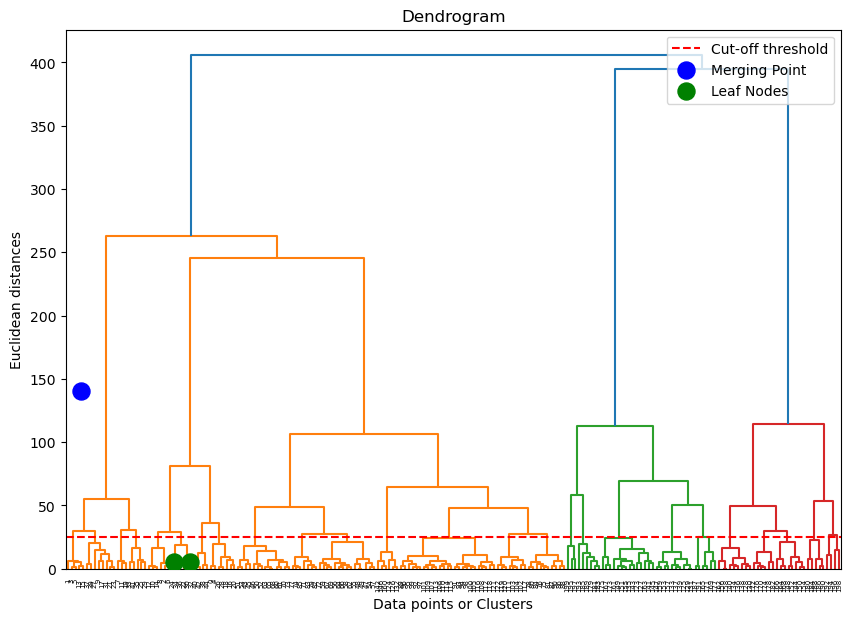

In [17]:
#Now we will find the optimal number of clusters using the Dendrogram for our model. 
#For this, we are going to use scipy library as it provides a function
#that will directly return the dendrogram for our code. Consider the below lines of code:

#Finding the optimal number of clusters using the dendrogram  
# Attempting to plot the dendrogram again

import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc  
plt.figure(figsize=(10, 7))

dendrogram = shc.dendrogram(shc.linkage(X, method='ward'))

# Highlighting some of the components in the dendrogram
plt.axhline(y=25, color='r', linestyle='--', label="Cut-off threshold")
plt.scatter([40], [140], color='blue', s=150, zorder=5, label="Merging Point")
plt.scatter([280, 320], [5, 5], color='green', s=150, zorder=5, label="Leaf Nodes")

plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.xlabel('Data points or Clusters')
plt.legend()
plt.show()


In the above lines of code, we have imported the hierarchy module of scipy library.

This module provides us a method shc.denrogram(), which takes the linkage() as a parameter.

The linkage function is used to define the distance between two clusters, 
so here we have passed the x(matrix of features), and method "ward," the popular 
method of linkage in hierarchical clustering.

The remaining lines of code are to describe the labels for the dendrogram plot.


Using this Dendrogram, we will now determine the optimal number of clusters for our model.
For this, we will find the maximum vertical distance that does not cut any horizontal bar. 
Consider the below diagram:
    

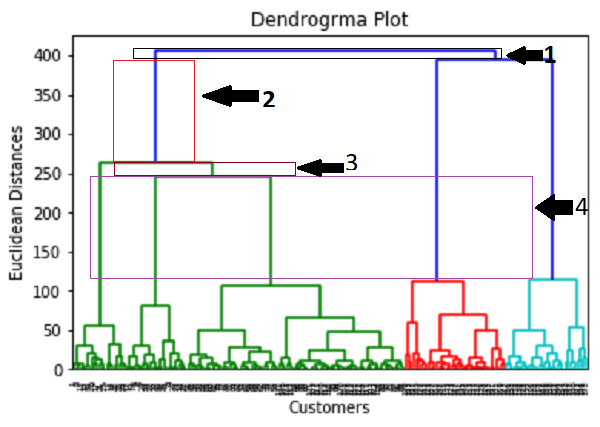

In [9]:
from IPython import display
display.Image("hierarchical-clustering-in-machine-learning13.png")

In the above diagram, we have shown the vertical distances that are not cutting their horizontal bars.

As we can visualize, the 4th distance is looking the maximum, so according to this, 
the number of clusters will be 5(the vertical lines in this range). 

We can also take the 2nd number as it approximately equals the 4th distance,
but we will consider the 5 clusters because the same we calculated in the K-means algorithm.

So, the optimal number of clusters will be 5, and we will train the model in the next step, using the same.




## Training the hierarchical model on the dataset

In [10]:
#As we know the required optimal number of clusters, we can now train our model. The code is given below:

#training the hierarchical model on dataset  
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [11]:
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In the above code, we have imported the AgglomerativeClustering class of cluster module of scikit learn library.

Then we have created the object of this class named as hc. 

The AgglomerativeClustering class takes the following parameters:

n_clusters=5: It defines the number of clusters, and we have taken here 5 because it is the optimal number of clusters.

affinity='euclidean': It is a metric used to compute the linkage.

linkage='ward': It defines the linkage criteria, here we have used the "ward" linkage. This method is the popular 
linkage method that we have already used for creating the Dendrogram. It reduces the variance in each cluster.

In the last line, we have created the dependent variable y_pred to fit or train the model. It does train not only the model but also returns the clusters to which each data point belongs.


As we can see in the above image, the y_pred shows the clusters value, which means the customer id 1 belongs to the 5th cluster (as indexing starts from 0, so 4 means 5th cluster), the customer id 2 belongs to 4th cluster, and so on.


## Visualising the clusters

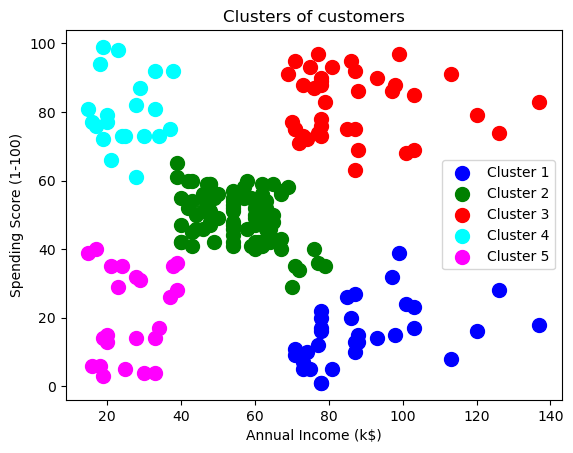

In [12]:
#visulaizing the clusters  
mtp.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
mtp.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
mtp.scatter(X[y_pred== 2, 0], X[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
mtp.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
mtp.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()  

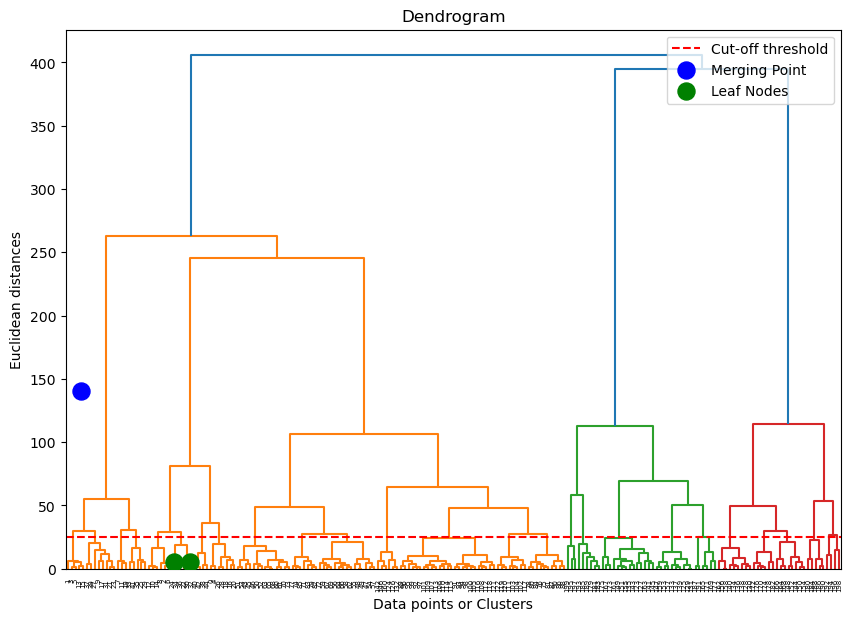

In [ ]:
#
Silhouette Score aka Silhouette Coefficient

Silhouette score aka Silhouette Coefficient 
is an evaluation metric that results in the range of -1 to 1.
A score near 1 signifies the best importance 
that the data point is very compact within the cluster 
to which it belongs and far away from the other clusters. 
The score near -1 signifies the least or worst importance 
of the data point. 
A score near 0 signifies overlapping clusters. 


In [24]:
from sklearn.metrics import silhouette_score
# B = np.reshape(y_pred, (-1, 2))
B=y_pred[:,np.newaxis]
ss = silhouette_score(B, hc.labels_)
print(ss)


1.0


In [ ]:
Rand Index

The Rand index is different from the adjusted rand index. 
Rand index does find the similarity between two 
clustering by considering all the pairs of the n_sample
but it ranges from 0 to 1. whereas ARI ranges from -1 to 1. 

The rand index is defined as:

RI = (number of agreeing pairs) / (number of pairs)


In [15]:
from sklearn.metrics import rand_score

ris = rand_score(y_pred, hc.labels_)
print(ris)


1.0


In [ ]:
Mutual Information

Mutual Information between two clusters is a measure 
of the similarity between two labels of the same data. 
That is it is used to check the mutual information in the 
actual label target vs the predicted model label. 


In [17]:
from sklearn.metrics import mutual_info_score

mis = mutual_info_score(y_pred, hc.labels_)
print(mis)


1.4610216263036029
